In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('../results/outcomes_reev_df.csv')
import matplotlib.pyplot as plt

img_folder = '../images/'

In [2]:
policy_names = [f'Policy {i}' for i in range(1,5)]

In [12]:
data.columns

Index(['Unnamed: 0', 'Expected Annual Damage', 'Dike Investment Costs',
       'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths',
       'policy', 'Total Costs'],
      dtype='object')

In [16]:
data.iloc[500]

Unnamed: 0                                 15000
Expected Annual Damage            1706663.501102
Dike Investment Costs           134691923.846425
RfR Investment Costs                1913400000.0
Evacuation Costs                       90.304279
Expected Number of Deaths               0.000106
policy                       scenario 3 policy 2
Total Costs                    2048091923.846425
Name: 500, dtype: object

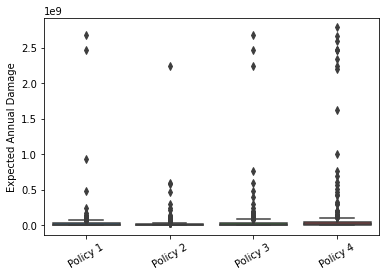

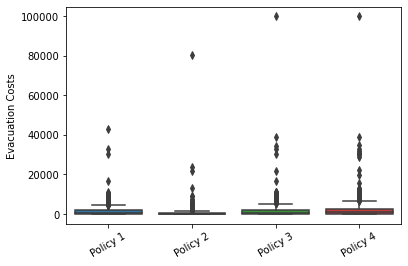

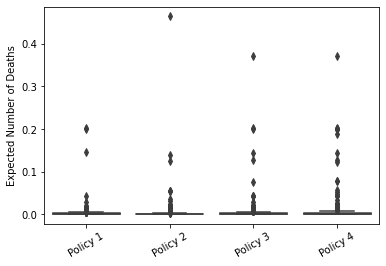

In [4]:
for column in ['Expected Annual Damage', 'Evacuation Costs', 'Expected Number of Deaths']:
    g = sns.boxplot(x="policy", y=column, data=data)
    g.set_xticklabels(labels=policy_names, rotation=30)
    g.set_xlabel('')
    plt.savefig(f"../images/boxplot_{column.replace(' ', '')}.png")
    plt.show()

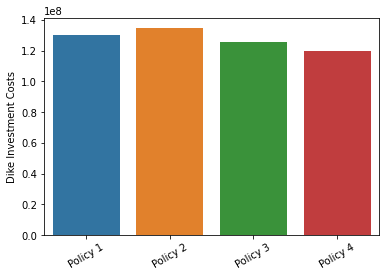

In [5]:
f, ax = plt.subplots(1)
sns.barplot(x='policy', y='Dike Investment Costs', data=data, ax=ax)
ax.set_xticklabels(labels=policy_names, rotation=30)
ax.set_xlabel('')
plt.savefig(img_folder+'dike_investment.png')

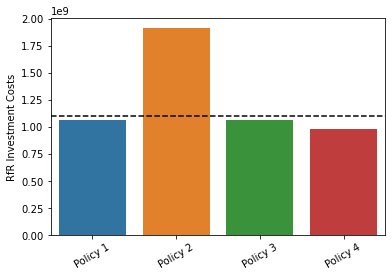

In [6]:
f, ax = plt.subplots(1)
sns.barplot(x='policy', y='RfR Investment Costs', data=data, ax=ax)
plt.axhline(y=1.1e9, color='black', linestyle='--')
ax.set_xticklabels(labels=policy_names, rotation=30)
ax.set_xlabel('')
plt.savefig(img_folder+'rfr_investment.png')

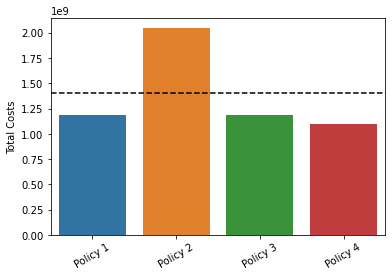

In [7]:
data['Total Costs'] = data['Dike Investment Costs'] + data['RfR Investment Costs']
f, ax = plt.subplots(1)
sns.barplot(x='policy', y='Total Costs', data=data, ax=ax)
ax.set_xticklabels(labels=policy_names, rotation=30)
plt.axhline(y=(1.1e9+3.04e8), color='black', linestyle='--')
ax.set_xlabel('')
plt.savefig(img_folder+'total_investment.png')

In [8]:
from ema_workbench import load_results
from sklearn import preprocessing

experiments_reev, outcomes_reev = load_results('../results/mordm_exp_2_1000.tar.gz') 
outcomes_reev_df = pd.DataFrame.from_dict(outcomes_reev)
outcomes_reev_df['policy']= experiments_reev['policy']

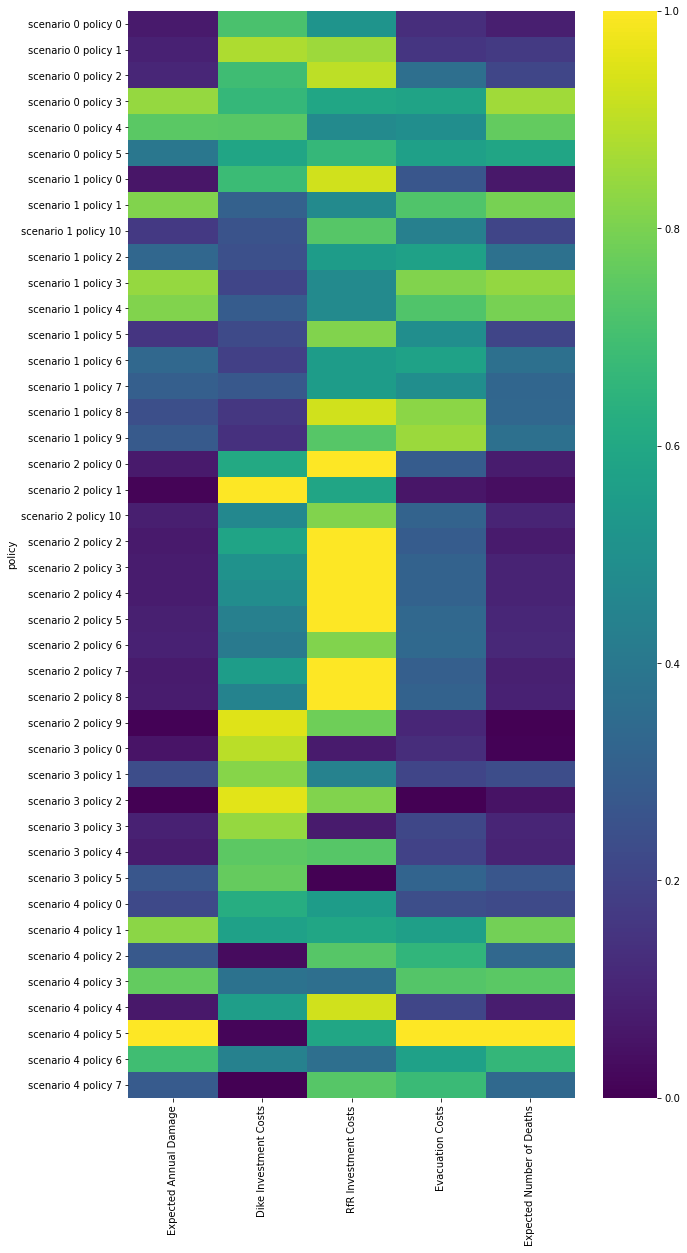

In [9]:
#heatmap for the mean
outcomes_reev_df = outcomes_reev_df.groupby('policy').mean()

#scaling
x = outcomes_reev_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=outcomes_reev_df.columns, index=outcomes_reev_df.index)

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(data=df_scaled, cmap='viridis', ax=ax)
plt.savefig(img_folder+'heatmap_mean.png')

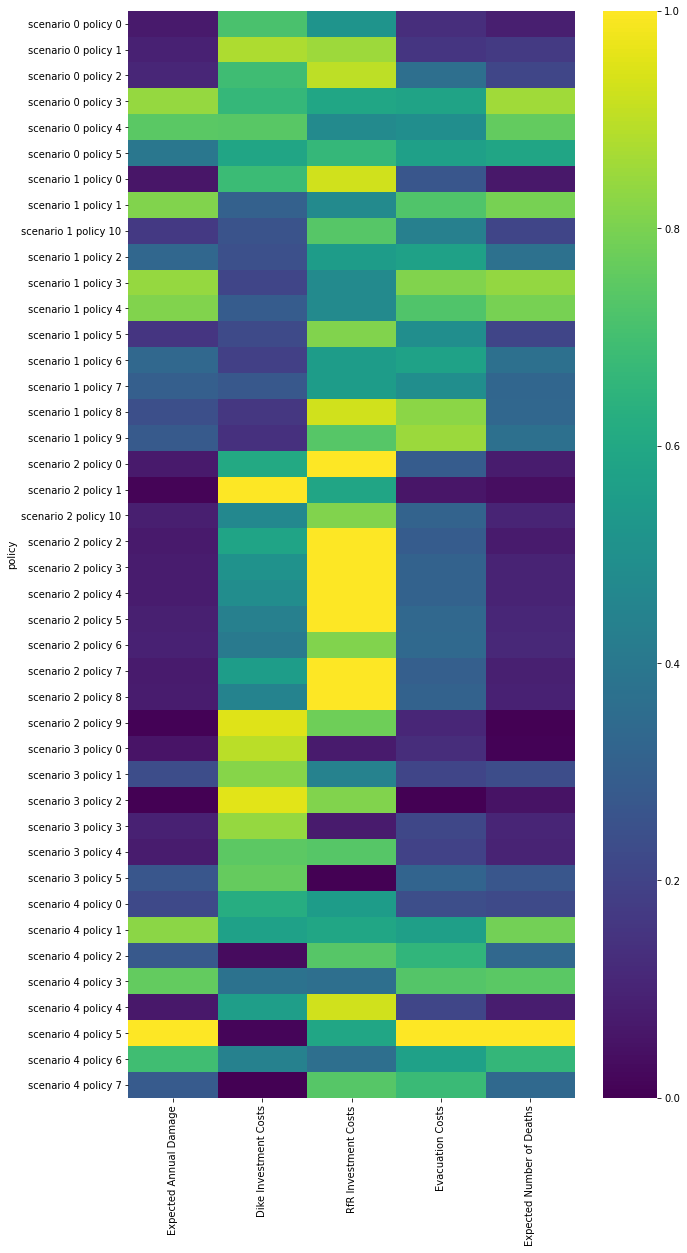

In [10]:
# heatmap for the max
outcomes_reev_df = outcomes_reev_df.groupby('policy').max()

#scaling
x = outcomes_reev_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=outcomes_reev_df.columns, index=outcomes_reev_df.index)

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(data=df_scaled, cmap='viridis', ax=ax)
plt.savefig(img_folder+'heatmap_max.png')